In [64]:
import numpy as np
import pandas as pd
import spectral_analysis as sa
from spectral_analysis import spectrum, ray
import matplotlib.pyplot as plt

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\spectral_analysis.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  p_per_unit = floor(1/spectrum_safe.spacing)


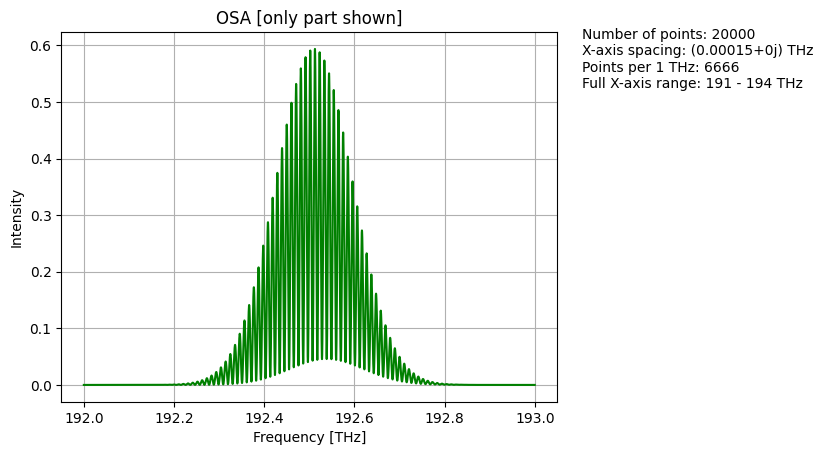

In [65]:
# prepare the pulse

def gaussian(omega, mu, sig):
    return np.exp(-np.power(omega - mu, 2.) / (2 * np.power(sig, 2.)))

gaussian = np.vectorize(gaussian)

X = np.linspace(191,194,20000)
Y_0 = X*0
Y = gaussian(X, 192.5, 0.12)

Y = Y.astype(complex)
X = X.astype(complex)
Y_0 = Y_0.astype(complex)

vertical = spectrum(X, Y, "freq", "intensity")
horizontal = spectrum(X, Y_0, "freq", "intensity")
light = ray(vertical, horizontal)

# propagate through system

light.polarizer(transmission_polar = "ver")

# chirping fiber
light.chirp(polarization = "ver", fiber_length = 60)
light.chirp(polarization = "hor", fiber_length = 60)
light.delay(polarization = "ver", delay = 60)         

light.rotate(np.pi*0.25)

# modulator
transmission_matrix = np.array([[0.43, 0.55],[0.07, 0.015]]) # modulates vertical polarization
light.mix(transmission_matrix)
light.delay(polarization = "ver", delay = 16)
light.shear(0.017, polarization = "ver")

#delaying fiber
light.chirp(polarization = "ver", fiber_length = 80)
light.chirp(polarization = "hor", fiber_length = 80)
light.delay(polarization = "ver", delay = 80)         

light.rotate(np.pi/4)

light.polarizer(transmission_polar = "ver")

spectr = light.OSA(start = 192, end = 193)

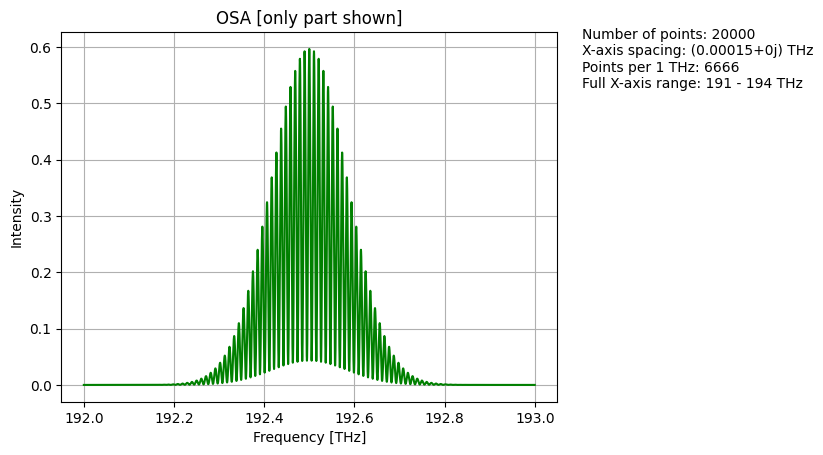

In [66]:
# prepare the pulse

def gaussian(omega, mu, sig):
    return np.exp(-np.power(omega - mu, 2.) / (2 * np.power(sig, 2.)))

gaussian = np.vectorize(gaussian)

X = np.linspace(191,194,20000)
Y_0 = X*0
Y = gaussian(X, 192.5, 0.12)

Y = Y.astype(complex)
X = X.astype(complex)
Y_0 = Y_0.astype(complex)

vertical = spectrum(X, Y, "freq", "intensity")
horizontal = spectrum(X, Y_0, "freq", "intensity")
light = ray(vertical, horizontal)

# propagate through system

light.polarizer(transmission_polar = "ver")

# chirping fiber
light.chirp(polarization = "ver", fiber_length = 60)
light.chirp(polarization = "hor", fiber_length = 60)
light.delay(polarization = "ver", delay = 60)         

light.rotate(np.pi*0.25)

# modulator
transmission_matrix = np.array([[0.43, 0.55],[0.07, 0.015]]) # modulates vertical polarization
light.mix(transmission_matrix)
light.delay(polarization = "ver", delay = 16)
#ray.shear(0.017, polarization = "ver")

#delaying fiber
light.chirp(polarization = "ver", fiber_length = 80)
light.chirp(polarization = "hor", fiber_length = 80)
light.delay(polarization = "ver", delay = 80)         

light.rotate(np.pi/4)

light.polarizer(transmission_polar = "ver")

temp_spectr = light.OSA(start = 192, end = 193)

In [70]:
pulse = sa.spider(phase_spectrum = spectr,
          temporal_spectrum = temp_spectr,
          shear = None,
          intensity_spectrum = None,
          phase_borders = [192.3, 192.7],
          what_to_return = "phase",
          vis_param = None,
          plot_steps = False,
          plot_phase = False,
          plot_pulse = False
          )[1]

pulse.Y *= -1

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\spectral_analysis.py:1109: ComplexWarning: Casting complex values to real discards the imaginary part
  integrate_interval = flr(shear/(s_freq_for_later.spacing))


# comparison

C:\Users\rewas\AppData\Local\Temp\ipykernel_2552\380116276.py:9: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


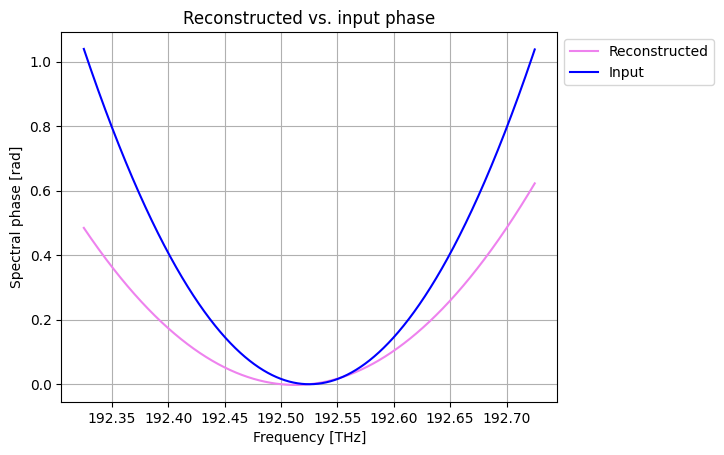

In [69]:
X = pulse.X

def phase(f, f_mean, fiber_length):
    l_0 = 1560
    c = 3*1e8
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

Y = phase(X, np.mean(X), 60)

sim_pulse = spectrum(X, Y, "freq", "phase")
sa.compare_plots([pulse, sim_pulse], title = "Reconstructed vs. input phase", legend = ["Reconstructed", "Input"])